<a href="https://colab.research.google.com/github/Shubhajit1988/Coursera_Capstone/blob/master/Project_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing library

In [0]:
import os
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch.utils.data as data
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt 

Downloading Data

In [0]:
apply_transform = transforms.Compose([transforms.Resize((224,224)),transforms.ToTensor()])
BatchSize = 100

DATA_PATH = "/content/drive/My Drive/covid"


Dataset = torchvision.datasets.ImageFolder(root=DATA_PATH, transform=apply_transform)

In [0]:
file_list1 = os.listdir("/content/drive/My Drive/covid/Figure1-COVID-chestxray-dataset-master/images")
file_list2=os.listdir("/content/drive/My Drive/covid/covid-chestxray-dataset-master/images")
file_list3=os.listdir("/content/drive/My Drive/covid/Covid19action-radiology-CXR_v1.1/images/Source2")
file_list4=os.listdir("/content/drive/My Drive/covid/Covid19action-radiology-CXR_v1.1/images/Source7")
file_list=file_list1+file_list2+file_list3+file_list4

In [0]:
!pip install panda
import pandas as pd

In [0]:
new_file_list=sorted(file_list)

Data Preprocessing

In [0]:
processed_data=[]
for i in range(len(file_list)):
  wb=pd.read_csv('/content/drive/My Drive/covid/Train_Combined.csv',index_col='Image Name')
  wb1=pd.read_csv('/content/drive/My Drive/covid/Train_Combined.csv')
  x=wb1['Image Name'].str.contains(file_list[i]).sum()
  if x==1:
    a=wb.loc[file_list[i]][2]
    b=wb.loc[file_list[i]][3]
    c=wb.loc[file_list[i]][4]
    if a==1:
      processed_data.append([Dataset[i][0],0])
    elif b==1:
      processed_data.append([Dataset[i][0],1])
    elif c==1:
      processed_data.append([Dataset[i][0],2])


Build Model

In [0]:
class model(nn.Module):
    def __init__(self):
        super(model, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.pool1 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv2 = nn.Conv2d(6, 10, kernel_size=5)
        self.pool2 = nn.MaxPool2d(kernel_size=2,stride=2)
        self.conv3 = nn.Conv2d(10, 16, kernel_size=6)
        self.pool3 = nn.MaxPool2d(kernel_size=2,stride=2) 
        self.conv4 = nn.Conv2d(16, 16, kernel_size=5)
        self.pool4 = nn.MaxPool2d(kernel_size=4,stride=4)       
        self.fc1 = nn.Linear(400, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = F.relu(self.conv3(x))
        x = self.pool3(x)
        x = F.relu(self.conv4(x))
        x = self.pool4(x)
        x = x.view(-1, 400)
        x = F.relu(self.fc1(x)) 
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return F.log_softmax(x,dim=1)

Data Loading

In [0]:
import sklearn
from sklearn import model_selection

training_dataset,test_dataset=model_selection.train_test_split(processed_data,train_size=0.8,random_state=1)
trainLoader = torch.utils.data.DataLoader(training_dataset, batch_size=BatchSize,shuffle=True, num_workers=4) # Creating dataloader
testLoader = torch.utils.data.DataLoader(test_dataset, batch_size=BatchSize,shuffle=True, num_workers=4) # Creating dataloader


Model Summary

In [62]:
use_gpu = torch.cuda.is_available()
net = model()
print(net)
if use_gpu:
    print('GPU is avaialble!')
    net = net.cuda()

model(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 10, kernel_size=(5, 5), stride=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(10, 16, kernel_size=(6, 6), stride=(1, 1))
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(16, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool4): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [0]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.2)

Executing Model

Epoch 1/30 : Training loss: 1.1290
Epoch 1/30 : Test loss: 2.2580|
Epoch 2/30 : Training loss: 1.0505
Epoch 2/30 : Test loss: 2.1010|
Epoch 3/30 : Training loss: 1.0245
Epoch 3/30 : Test loss: 2.0490|
Epoch 4/30 : Training loss: 0.9662
Epoch 4/30 : Test loss: 1.9324|
Epoch 5/30 : Training loss: 0.9277
Epoch 5/30 : Test loss: 1.8555|
Epoch 6/30 : Training loss: 0.8767
Epoch 6/30 : Test loss: 1.7534|
Epoch 7/30 : Training loss: 0.8936
Epoch 7/30 : Test loss: 1.7872|
Epoch 8/30 : Training loss: 0.8382
Epoch 8/30 : Test loss: 1.6764|
Epoch 9/30 : Training loss: 0.8583
Epoch 9/30 : Test loss: 1.7166|
Epoch 10/30 : Training loss: 0.8112
Epoch 10/30 : Test loss: 1.6225|
Epoch 11/30 : Training loss: 0.8163
Epoch 11/30 : Test loss: 1.6326|
Epoch 12/30 : Training loss: 0.7630
Epoch 12/30 : Test loss: 1.5261|
Epoch 13/30 : Training loss: 0.7486
Epoch 13/30 : Test loss: 1.4972|
Epoch 14/30 : Training loss: 0.7512
Epoch 14/30 : Test loss: 1.5023|
Epoch 15/30 : Training loss: 0.7398
Epoch 15/30 : Te

Text(0.5, 1.0, 'testing loss')

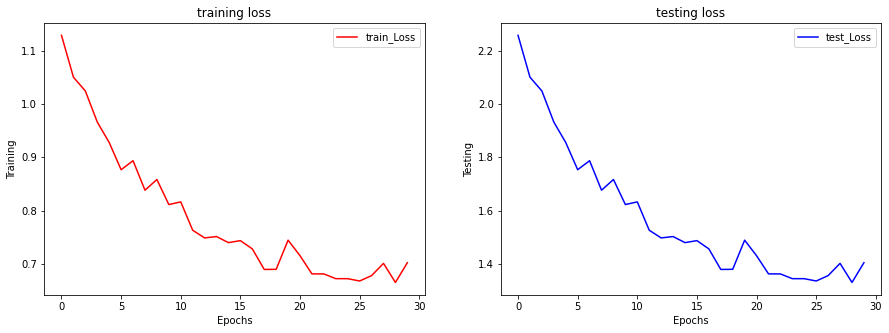

In [81]:
import torch.optim as optim
optimizer = optim.SGD(net.parameters(), lr=0.15)
criterion = nn.CrossEntropyLoss() 

num_epochs = 30

train_loss = []

test_loss=[]

for epoch in range(num_epochs):
    
    running_loss = 0.0 
    running_corr = 0
        
    for i,data in enumerate(trainLoader):
        inputs,labels = data
        if use_gpu:
            inputs, labels = inputs.cuda(),labels.cuda() 
        # Initializing model gradients to zero
        net.zero_grad() 
        # Data feed-forward through the network
        outputs = net(inputs)
        # Predicted class is the one with maximum probability
        preds = torch.argmax(outputs,dim=1)
        # Finding the loss
        loss = criterion(outputs, labels)
        # Accumulating the loss for each batch
        running_loss += loss 
            
        
    totalLoss = running_loss/(i+1)
    # Calculating gradients
    totalLoss.backward()
    optimizer.step()
    
        
    epoch_loss_train = running_loss.item()/(i+1)   #Total loss for one epoch
  
         
    train_loss.append(epoch_loss_train) #Saving the loss over epochs for plotting the graph
    #train_acc.append(epoch_acc) #Saving the accuracy over epochs for plotting the graph

    
    
    for i,data in enumerate(testLoader):
        inputs,labels = data
        if use_gpu:
            inputs, labels = inputs.cuda(),labels.cuda()
            net.zero_grad()
            outputs = net(inputs)
            # Predicted class is the one with maximum probability
            preds = torch.argmax(outputs,dim=1)
            # Finding the loss
            loss = criterion(outputs, labels)
            # Accumulating the loss for each batch
            running_loss=running_loss+loss
              
        
    totalLoss = running_loss/(i+1)
    epoch_loss_test = running_loss/(i+1)   #Total loss for one epoch
    #epoch_loss_test = running_loss.item()/(i+1)
    
    test_loss.append(epoch_loss_test)

        
    print('Epoch {:.0f}/{:.0f} : Training loss: {:.4f}'.format(epoch+1,num_epochs,epoch_loss_train))
    print('Epoch {:.0f}/{:.0f} : Test loss: {:.4f}|'.format(epoch+1,num_epochs,epoch_loss_test))


fig = plt.figure(figsize=[15,5]) 
plt.subplot(1,2,1)
plt.plot(range(30),train_loss,'r-',label='train_Loss')  
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Training')
plt.title('training loss')

plt.subplot(1,2,2)
plt.plot(range(30),test_loss,'b-',label='test_Loss') 
plt.legend(loc='upper right')
plt.xlabel('Epochs')
plt.ylabel('Testing')
plt.title('testing loss')